# Semantic Segmentation
> U-Net <br>
> Motorcycle images <br> 

Of 6 classes
- Undrivable, road, lanemark, my bike, rider, movable

In [1]:
CLASS_COUNT = 6

# Table of contents
1. [Introduction](#introduction) 
2. [Packages, functions, classes](#packages-classes)
3. [Data](#data)
    1. [Prepare, visualize data](#prepare-data)
    2. [Preprocess data](#preprocess-data)
    3. [Prepare dataset](#train-val-test)
4. [Modelling](#modelling)

# Introduction<a name="introduction"></a> 

## Kaggle dataset download

In [2]:
!pip install opendatasets

     |████████████████████████████████| 83 kB 2.5 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 78 kB 10.8 MB/s            
  Created wheel for kaggle: filename=kaggle-1.5.16-py3-none-any.whl size=110701 sha256=051d9fd8455901829d77833dc7dc7fbb0731513c27477e71b09e8f16a83b1dfd
  Stored in directory: /aiffel/.cache/pip/wheels/d2/ed/a5/da3a0cfb13373d1ace41cafa4f2467d858c55c52473ba72799
Successfully built kaggle


In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sadhliroomyprime/motorcycle-night-ride-semantic-segmentation/data'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: brian604
Your Kaggle Key: ········


100%|██████████| 325M/325M [00:06<00:00, 53.4MB/s] 

- Move the dataset to temporary position (`/aiffel`)

# Packages, functions, classes<a name="packages-classes"></a> 

In [4]:
import cv2
import numpy as np

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

In [26]:
import os
import glob

In [7]:
import tensorflow as tf

In [8]:
%matplotlib inline

In [9]:
@tf.function
def load_image(image_path):
    file = tf.io.read_file(image_path)
    image = tf.image.decode_png(file, channels=3, dtype=tf.uint8) # no decimal numbers are there using in an image
    return image

In [10]:
@tf.function
def normalize(x):
    x = tf.cast(x, tf.float32)
    return (x/127.5) - 1

def denormalize(x):
    x = (x+1)*127.5
    x = x.numpy()
    return x.astype(np.uint8)

# Data<a name="data"></a> 

In [29]:
datap = '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images'

In [31]:
image_paths=sorted(glob.glob(datap + '/Screenshot*'))

In [32]:
image_paths[:3]

['/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___fuse.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___save.png']

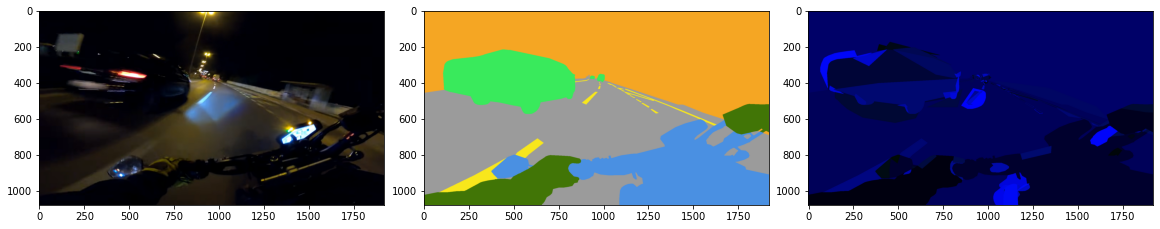

In [33]:
original_image = image_paths[0]
label_image_instance = image_paths[1]
label_image_semantic = image_paths[2]
fig, axs = plt.subplots(1, 3, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_instance = Image.open(label_image_instance)
label_image_instance = np.asarray(label_image_instance)

axs[1].imshow(label_image_instance)
axs[1].grid(False)


label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)

axs[2].imshow(label_image_semantic)
axs[2].grid(False)

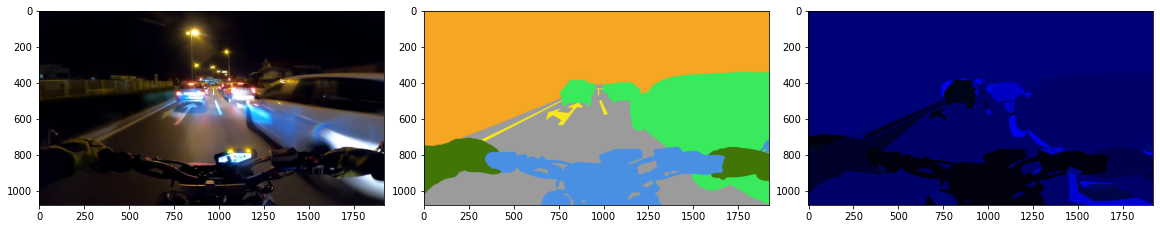

In [34]:
original_image = image_paths[9]
label_image_instance = image_paths[10]
label_image_semantic = image_paths[11]
fig, axs = plt.subplots(1, 3, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_instance = Image.open(label_image_instance)
label_image_instance = np.asarray(label_image_instance)

axs[1].imshow(label_image_instance)
axs[1].grid(False)


label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)

axs[2].imshow(label_image_semantic)
axs[2].grid(False)

In [35]:
label_image_semantic

array([[[  0,   1, 119, 255],
        [  0,   1, 119, 255],
        [  0,   1, 119, 255],
        ...,
        [  0,   1, 119, 255],
        [  0,   1, 119, 255],
        [  0,   1, 119, 255]],

       [[  0,   1, 119, 255],
        [  0,   1, 119, 255],
        [  0,   1, 119, 255],
        ...,
        [  0,   1, 119, 255],
        [  0,   1, 119, 255],
        [  0,   1, 119, 255]],

       [[  0,   1, 119, 255],
        [  0,   1, 119, 255],
        [  0,   1, 119, 255],
        ...,
        [  0,   1, 119, 255],
        [  0,   1, 119, 255],
        [  0,   1, 119, 255]],

       ...,

       [[  0,   1, 104, 255],
        [  0,   1, 104, 255],
        [  0,   1, 104, 255],
        ...,
        [  0,   2, 208, 255],
        [  0,   2, 208, 255],
        [  0,   2, 208, 255]],

       [[  0,   1, 104, 255],
        [  0,   1, 104, 255],
        [  0,   1, 104, 255],
        ...,
        [  0,   2, 208, 255],
        [  0,   2, 208, 255],
        [  0,   2, 208, 255]],

       [[  0

> We can see that "*.png" is an actual data, "*.png__save.png" is a mask for instance segmentation,   
and "*.png__save.png" is a mask for semantic segmentation I guess

`What about night rides? Any differences?`

In [36]:
night_paths=sorted(glob.glob(datap + '/night*'))

In [37]:
night_paths[:3]

['/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (10).png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (10).png___fuse.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (10).png___save.png']

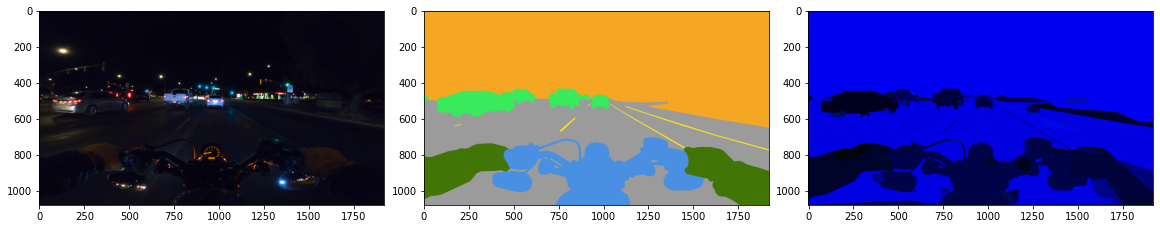

In [38]:
original_image = night_paths[0]
label_image_instance = night_paths[1]
label_image_semantic = night_paths[2]
fig, axs = plt.subplots(1, 3, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_instance = Image.open(label_image_instance)
label_image_instance = np.asarray(label_image_instance)

axs[1].imshow(label_image_instance)
axs[1].grid(False)


label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)

axs[2].imshow(label_image_semantic)
axs[2].grid(False)

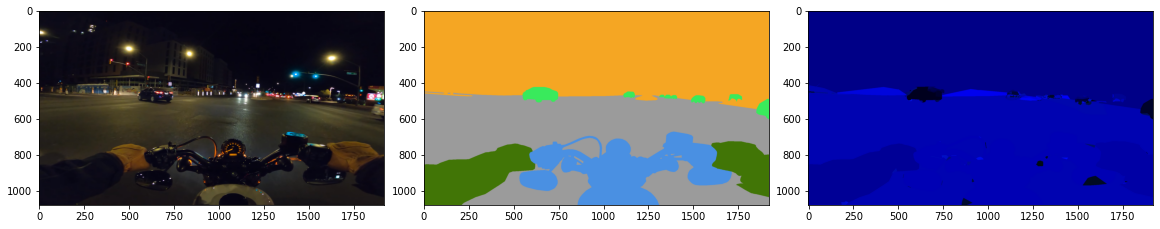

In [39]:
original_image = night_paths[3]
label_image_instance = night_paths[4]
label_image_semantic = night_paths[5]
fig, axs = plt.subplots(1, 3, figsize=(16, 8), constrained_layout=True)

axs[0].imshow( Image.open(original_image))
axs[0].grid(False)

label_image_instance = Image.open(label_image_instance)
label_image_instance = np.asarray(label_image_instance)

axs[1].imshow(label_image_instance)
axs[1].grid(False)


label_image_semantic = Image.open(label_image_semantic)
label_image_semantic = np.asarray(label_image_semantic)

axs[2].imshow(label_image_semantic)
axs[2].grid(False)

In [40]:
label_image_instance.shape

(1080, 1920, 4)

In [41]:
a = np.unique(label_image_instance, axis = 0)

In [42]:
a.shape

(568, 1920, 4)

In [43]:
colors = np.unique(np.vstack(a),
          axis = 0)

In [44]:
colors

array([[ 57, 234,  92, 255],
       [ 65, 117,   6, 255],
       [ 74, 144, 226, 255],
       [155, 155, 155, 255],
       [245, 166,  35, 255]], dtype=uint8)

In [45]:
objs = np.array(['movable', 
                'rider', 'bike', 'road',
                'undrivable', 'lanemark'])

In [46]:
np.where(objs == 'road')

(array([3]),)

In [47]:
colors[3]

array([155, 155, 155, 255], dtype=uint8)

In [48]:
# Helper visualization function
def showim(img):
    img_prep = np.concatenate((img, img, img), axis =2)
    plt.figure()
    plt.imshow(img_prep, cmap='gray')
    plt.show()

- Another way to load images using `tensorflow.keras`
    - Source: Deep Learning with Python 2E (Chapter 9)

- Undrivable, road, lanemark, my bike, rider, movable

In [49]:
from tensorflow.keras.utils import load_img, img_to_array

# Preprocess Data<a name="#preprocess-data"></a> 

## Mask to the image

In [50]:
road_mask = np.all(label_image_instance == colors[3], axis=2) #colors[3] where road mask color is

In [51]:
road_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [52]:
road_mask.shape

(1080, 1920)

In [53]:
road_mask = road_mask.reshape(*road_mask.shape, 1)

In [54]:
road_mask.shape

(1080, 1920, 1)

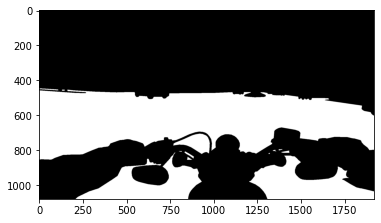

In [55]:
# (0,1) into BW
road_mask_bw = road_mask.astype(np.uint8)*255
showim(road_mask_bw)

> Might be good if we can visualize image data pixel distribution for files of which names include "Screenshot" or "Night"

In [57]:
image_paths[:10]

['/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___fuse.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (309).png___save.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (310).png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (310).png___fuse.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/Screenshot (310).png___save.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Nigh

In [58]:
len(image_paths)

321

In [59]:
len(night_paths)

279

In [61]:
len(night_paths) // 3

93

In [62]:
len(image_paths) // 3

107

In [63]:
night_paths[:10]

['/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (10).png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (10).png___fuse.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (10).png___save.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (100).png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (100).png___fuse.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images/night ride (100).png___save.png',
 '/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night R

- Do some operations into the dataset so I can run `image_dataset_from_directory` in `tensorflow.keras.utils`, easily

In [64]:
import os

In [65]:
from pathlib import Path

In [66]:
datap_parent = str(Path(datap).parent)

In [67]:
datap_parent

'/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset'

In [68]:
maskinst_directory = datap_parent + '/maskinstance'

In [69]:
mask_directory = datap_parent + '/mask'

In [70]:
os.makedirs(maskinst_directory, exist_ok = True)

In [71]:
os.makedirs(mask_directory, exist_ok = True)

In [72]:
files = os.listdir(datap)

In [73]:
night_paths[11].split('/')[-1].split('.')[1].split('___')

['png', 'save']

In [74]:
import shutil

In [75]:
for f in files:
    if '___fuse' in f:
        shutil.move(os.path.join(datap, f), 
                    os.path.join(maskinst_directory, f))
    elif '__save' in f:
        shutil.move(os.path.join(datap, f), 
                    os.path.join(mask_directory, f))

In [76]:
load_image(original_image)

<tf.Tensor: shape=(1080, 1920, 3), dtype=uint8, numpy=
array([[[14, 13, 24],
        [14, 13, 24],
        [14, 13, 24],
        ...,
        [ 9,  8, 21],
        [ 9,  8, 21],
        [ 9,  8, 21]],

       [[14, 13, 24],
        [14, 13, 24],
        [14, 13, 24],
        ...,
        [ 9,  8, 21],
        [ 9,  8, 21],
        [ 9,  8, 21]],

       [[14, 13, 24],
        [14, 13, 24],
        [14, 13, 24],
        ...,
        [ 9,  8, 21],
        [ 9,  8, 21],
        [ 9,  8, 21]],

       ...,

       [[12, 11, 25],
        [12, 11, 25],
        [12, 11, 25],
        ...,
        [29, 24, 23],
        [29, 24, 23],
        [29, 24, 23]],

       [[12, 11, 24],
        [12, 11, 24],
        [12, 11, 24],
        ...,
        [28, 24, 22],
        [28, 24, 22],
        [28, 24, 22]],

       [[ 6,  5, 19],
        [ 6,  5, 19],
        [ 6,  5, 19],
        ...,
        [15, 11, 10],
        [15, 11, 10],
        [15, 11, 10]]], dtype=uint8)>

In [77]:
def read_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (image_size, image_size))
    return img

In [78]:
files

['night ride (66).png___save.png',
 'Screenshot (310).png___fuse.png',
 'Screenshot (390).png___save.png',
 'Screenshot (374).png',
 'Screenshot (428).png___save.png',
 'night ride (55).png___fuse.png',
 'night ride (42).png___save.png',
 'Screenshot (321).png___fuse.png',
 'Screenshot (443).png___save.png',
 'Screenshot (409).png___save.png',
 'Screenshot (390).png',
 'Screenshot (374).png___save.png',
 'night ride (30).png',
 'Screenshot (371).png___save.png',
 'night ride (71).png',
 'night ride (47).png___save.png',
 'Screenshot (421).png___save.png',
 'night ride (10).png___save.png',
 'night ride (62).png___fuse.png',
 'Screenshot (418).png___fuse.png',
 'night ride (85).png',
 'night ride (59).png',
 'Screenshot (309).png',
 'night ride (92).png',
 'Screenshot (427).png',
 'Screenshot (311).png___save.png',
 'Screenshot (425).png___fuse.png',
 'Screenshot (449).png___save.png',
 'Screenshot (423).png.png___fuse.png',
 'Screenshot (405).png___save.png',
 'night ride (25).png___fu

In [79]:
b = os.listdir(datap_parent+'/images')

In [80]:
len(b)

200

In [81]:
import random

In [82]:
train_images = random.sample(b, 
                     int(len(b) * 0.7))

In [83]:
b = [f for f in b if f not in train_images]

In [84]:
len(b)

60

In [85]:
val_images = random.sample(b, 
                           40)

In [86]:
b = [f for f in b if f not in val_images]

In [87]:
test_images = b

In [88]:
train_images

['night ride (33).png',
 'night ride (26).png',
 'night ride (37).png',
 'Screenshot (364).png',
 'night ride (97).png',
 'Screenshot (326).png',
 'night ride (14).png',
 'Screenshot (354).png',
 'night ride (93).png',
 'Screenshot (376).png',
 'night ride (86).png',
 'Screenshot (397).png',
 'night ride (38).png',
 'Screenshot (386).png',
 'night ride (46).png',
 'Screenshot (435).png',
 'Screenshot (450).png',
 'Screenshot (409).png',
 'night ride (55).png',
 'night ride (47).png',
 'Screenshot (324).png',
 'Screenshot (428).png',
 'night ride (50).png',
 'night ride (69).png',
 'Screenshot (448).png',
 'night ride (81).png',
 'Screenshot (434).png',
 'Screenshot (358).png',
 'night ride (78).png',
 'night ride (59).png',
 'Screenshot (366).png',
 'Screenshot (310).png',
 'Screenshot (429).png.png',
 'night ride (35).png',
 'night ride (70).png',
 'Screenshot (430).png',
 'Screenshot (385).png',
 'night ride (60).png',
 'night ride (21).png',
 'night ride (85).png',
 'Screenshot (417

In [89]:
print("List 2:", val_images)
print("List 3:", test_images)

List 2: ['Screenshot (389).png', 'night ride (87).png', 'Screenshot (359).png', 'Screenshot (445).png', 'night ride (40).png', 'Screenshot (374).png', 'Screenshot (400).png', 'Screenshot (363).png', 'night ride (19).png', 'Screenshot (362).png', 'night ride (22).png', 'Screenshot (433).png', 'night ride (29).png', 'night ride (31).png', 'Screenshot (443).png', 'Screenshot (379).png', 'night ride (90).png', 'Screenshot (441).png', 'night ride (68).png', 'Screenshot (361).png', 'Screenshot (309).png', 'night ride (41).png', 'night ride (10).png', 'night ride (43).png', 'night ride (27).png', 'Screenshot (387).png', 'Screenshot (419).png', 'Screenshot (440).png', 'night ride (83).png', 'Screenshot (313).png', 'night ride (42).png', 'Screenshot (405).png', 'Screenshot (398).png', 'night ride (44).png', 'Screenshot (446).png', 'night ride (71).png', 'Screenshot (432).png', 'Screenshot (319).png', 'Screenshot (422).png', 'night ride (75).png']
List 3: ['night ride (63).png', 'Screenshot (317

In [90]:
import re

In [91]:
numbers = [int ("".join (re.findall ("\\d+", s))) for s in train_images]
print (numbers)

[33, 26, 37, 364, 97, 326, 14, 354, 93, 376, 86, 397, 38, 386, 46, 435, 450, 409, 55, 47, 324, 428, 50, 69, 448, 81, 434, 358, 78, 59, 366, 310, 429, 35, 70, 430, 385, 60, 21, 85, 417, 45, 418, 61, 30, 15, 370, 88, 372, 375, 11, 322, 438, 16, 312, 392, 49, 355, 447, 384, 54, 58, 9, 413, 48, 439, 39, 79, 371, 74, 56, 421, 377, 28, 381, 393, 406, 390, 442, 64, 444, 378, 395, 73, 34, 25, 18, 66, 380, 318, 404, 323, 89, 396, 52, 80, 57, 96, 95, 383, 20, 411, 437, 314, 423, 92, 412, 62, 67, 414, 72, 394, 100, 94, 420, 311, 449, 98, 408, 13, 388, 368, 17, 424, 53, 401, 427, 410, 76, 325, 403, 391, 24, 23, 99, 373, 36, 65, 82, 353]


In [101]:
maskinst_directory_list = os.listdir(maskinst_directory)

> I am planning to use `image_dataset_from_directory` from `tensorflow.keras.utils`

In [ ]:
for f in files:
    if '___fuse' in f:
        shutil.move(os.path.join(datap, f), 
                    os.path.join(maskinst_directory, f))
    elif '__save' in f:
        shutil.move(os.path.join(datap, f), 
                    os.path.join(mask_directory, f))

In [102]:
datap

'/aiffel/motorcycle-night-ride-semantic-segmentation/www.acmeai.tech ODataset 1 - Motorcycle Night Ride Dataset/images'

In [103]:
train_datap = datap_parent + '/train'

In [104]:
os.makedirs(train_datap, exist_ok = True)

In [109]:
for i in train_images:
    t = f"{datap}/{i}"
    shutil.move(os.path.join(datap,i),
               os.path.join(train_datap,i))

# U-net Model<a name="modelling"></a> 

In [261]:
IMAGE_SIZE = 572
INPUT_SIZE = (572,572)

In [296]:
import keras

In [97]:
import tensorflow as tf
from tensorflow import keras

In [100]:
class UNet(keras.layers.Layer):
    # Initialize the layers and operations
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        # Contracting path
        self.conv1 = keras.layers.Conv2D(64, 3, padding="same", activation="relu")
        self.conv2 = keras.layers.Conv2D(64, 3, padding="same", activation="relu")
        self.pool1 = keras.layers.MaxPool2D(2, 2)
        self.conv3 = keras.layers.Conv2D(128, 3, padding="same", activation="relu")
        self.conv4 = keras.layers.Conv2D(128, 3, padding="same", activation="relu")
        self.pool2 = keras.layers.MaxPool2D(2, 2)
        self.conv5 = keras.layers.Conv2D(256, 3, padding="same", activation="relu")
        self.conv6 = keras.layers.Conv2D(256, 3, padding="same", activation="relu")
        self.pool3 = keras.layers.MaxPool2D(2, 2)
        self.conv7 = keras.layers.Conv2D(512, 3, padding="same", activation="relu")
        self.conv8 = keras.layers.Conv2D(512, 3, padding="same", activation="relu")
        self.pool4 = keras.layers.MaxPool2D(2, 2)
        self.conv9 = keras.layers.Conv2D(1024, 3, padding="same", activation="relu")
        self.conv10 = keras.layers.Conv2D(1024, 3, padding="same", activation="relu")
        # Expansive path
        self.upconv1 = keras.layers.Conv2DTranspose(512, 2, strides=2, padding="same")
        self.conv11 = keras.layers.Conv2D(512, 3, padding="same", activation="relu")
        self.conv12 = keras.layers.Conv2D(512, 3, padding="same", activation="relu")
        self.upconv2 = keras.layers.Conv2DTranspose(256, 2, strides=2, padding="same")
        self.conv13 = keras.layers.Conv2D(256, 3, padding="same", activation="relu")
        self.conv14 = keras.layers.Conv2D(256, 3, padding="same", activation="relu")
        self.upconv3 = keras.layers.Conv2DTranspose(128, 2, strides=2, padding="same")
        self.conv15 = keras.layers.Conv2D(128, 3, padding="same", activation="relu")
        self.conv16 = keras.layers.Conv2D(128, 3, padding="same", activation="relu")
        self.upconv4 = keras.layers.Conv2DTranspose(64, 2, strides=2, padding="same")
        self.conv17 = keras.layers.Conv2D(64, 3, padding="same", activation="relu")
        self.conv18 = keras.layers.Conv2D(64, 3, padding="same", activation="relu")
        # Final layer
        self.conv19 = keras.layers.Conv2D(out_channels, 1, padding="same")
       # Define the forward pass logic
    def call(self, inputs):
        # Contracting path
        x1 = self.conv1(inputs)
        x1 = self.conv2(x1)
        x2 = self.pool1(x1)
        x2 = self.conv3(x2)
        x2 = self.conv4(x2)
        x3 = self.pool2(x2)
        x3 = self.conv5(x3)
        x3 = self.conv6(x3)
        x4 = self.pool3(x3)
        x4 = self.conv7(x4)
        x4 = self.conv8(x4)
        x5 = self.pool4(x4)
        x5 = self.conv9(x5)
        x5 = self.conv10(x5)
        # Expansive path
        x6 = self.upconv1(x5)
        x6 = keras.layers.concatenate([x6, x4]) # Concatenate along the channel dimension
        x6 = self.conv11(x6)
        x6 = self.conv12(x6)
        x7 = self.upconv2(x6)
        x7 = keras.layers.concatenate([x7, x3])
        x7 = self.conv13(x7)
        x7 = self.conv14(x7)
        x8 = self.upconv3(x7)
        x8 = keras.layers.concatenate([x8, x2])
        x8 = self.conv15(x8)
        x8 = self.conv16(x8)
        x9 = self.upconv4(x8)
        x9 = keras.layers.concatenate([x9, x1])
        x9 = self.conv17(x9)
        x9 = self.conv18(x9)
        # Final layer
        x10 = self.conv19(x9)
        return x10     